# Homework 2

## Part 1: Perceptron from Scratch

The objective of Part 1 of this assignment is to implement the perceptron learning algorithm from scratch using Python. This exercise will help you understand the fundamentals of neural networks and linear classifiers in machine learning. By the end of this assignment, you will have a working perceptron model that can classify linearly separable datasets.

### Background

The Perceptron is a simple learning algorithm that forms the historical basis for today's neural networks. The perceptron takes in several real-valued inputs $x_1, x_2, ..., x_n$ and produces a single binary output. The model computes a weighted sum of its inputs and "fires" or "activates" if the sum exceeds a threshold.

The perceptron decision boundary is defined by a weight vector $\mathbf{w}$ and a bias $b$. The algorithm updates these parameters based on the training data.

Given a training set of $n$ samples $(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_n, y_n)$, where $\mathbf{x}_i \in \mathbb{R}^d$ and $y_i \in \{-1, 1\}$, the perceptron makes predictions using the sign of the linear combination of the inputs and weights:

$$
\hat{y}(\mathbf{x}) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)
$$

where $\text{sign}(z)$ is a function that returns $1$ if $z \geq 0$ and $-1$ otherwise.

The perceptron updates its weights $\mathbf{w}$ and bias $b$ using the perceptron learning rule:

$$
\mathbf{w}_{\text{next step}} = \mathbf{w} + \eta(y - \hat{y})\mathbf{x}
$$
$$
b_{\text{next step}} = b + \eta(y - \hat{y})
$$

Here, $\eta$ is the learning rate, a small positive scalar determining the step size of the update, $y$ is the true label, and $\hat{y}$ is the predicted label.

### Algorithm Steps

1. **Initialization**: Start with $\mathbf{w} = 0$ or small random values and $b=0$.
2. **For each training example** $(\mathbf{x}_i, y_i)$:
   - Compute the output $\hat{y}(\mathbf{x}_i) = \text{sign}(\mathbf{w} \cdot \mathbf{x}_i + b)$.
   - Update the weights and bias if $\hat{y} \neq y_i$:
     - $\mathbf{w} \leftarrow \mathbf{w} + \eta(y_i - \hat{y}(\mathbf{x}_i))\mathbf{x}_i$
     - $b \leftarrow b + \eta(y_i - \hat{y}(\mathbf{x}_i))$
3. **Repeat**: Go through the training set multiple times, until the algorithm converges (no misclassifications) or a predefined number of iterations is reached.

The perceptron algorithm is guaranteed to converge on linearly separable data sets, but it does not converge if the data is not linearly separable.

### Your Implementation

- **1.1**: **Define the Perceptron Class**: Create a class `Perceptron` with methods for initialization (`__init__`), training (`fit`), and prediction (`predict`).
  - The `__init__` method should initialize the weights and the threshold.
  - The `fit` method should implement the perceptron learning algorithm, adjusting the weights based on the inputs and the target output.
  - The `predict` method should take inputs and produce the perceptron's output for those inputs.

- **1.2**: **Implement the Learning Rule**

  Within the `fit` method, implement the learning rule:

  $$
  w_i = w_i + \Delta w_i
  $$

  where:

  $$
  \Delta w_i = \eta (y - \hat{y}) x_i
  $$

  In this equation, $\eta$ represents the learning rate, a small positive scalar that controls the step size of the weight update. The variable $y$ is the actual output of the training example, and $\hat{y}$ is the predicted output by the perceptron. The term $x_i$ refers to the $i^{th}$ feature of the input vector $\mathbf{x}$.

  This learning rule adjusts the weights $w_i$ in the direction that would reduce the difference between the actual output $y$ and the predicted output $\hat{y}$. The adjustment is proportional to the input feature $x_i$, which means the algorithm updates the weight of a feature based on how influential that feature is in causing the error.

- **1.3**: **Testing and Evaluation**

  **Test Your Model**: Create a simple dataset with two features and one binary target variable representing a linearly-separable binary classification problem. You'll use this dataset to train and test your perceptron. Split your dataset into training and testing sets, using an 80/20 split.

  You might use the `make_classification` or `make_blobs` functions from the `sklearn.datasets` module to generate this dataset. 

  Plot your dataset to visualize the distribution of the classes. Create a scatterplot, with axes representing the two features and different colors for each class.

  **Evaluate Your Model**: After training, evaluate the accuracy of your model on the testing set. Calculate the proportion of correctly predicted instances to demonstrate the efficacy of your perceptron.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
df = pd.read_csv('/Users/freddiekiessling/Desktop/Data Science/ECS 111/HW2/Dry_Beans_Dataset.csv')

/var/folders/nn/t968vcqd4wl6zwk895_zbx2r0000gn/T/ipykernel_16834/1032601730.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


Model Accuracy: 1.00


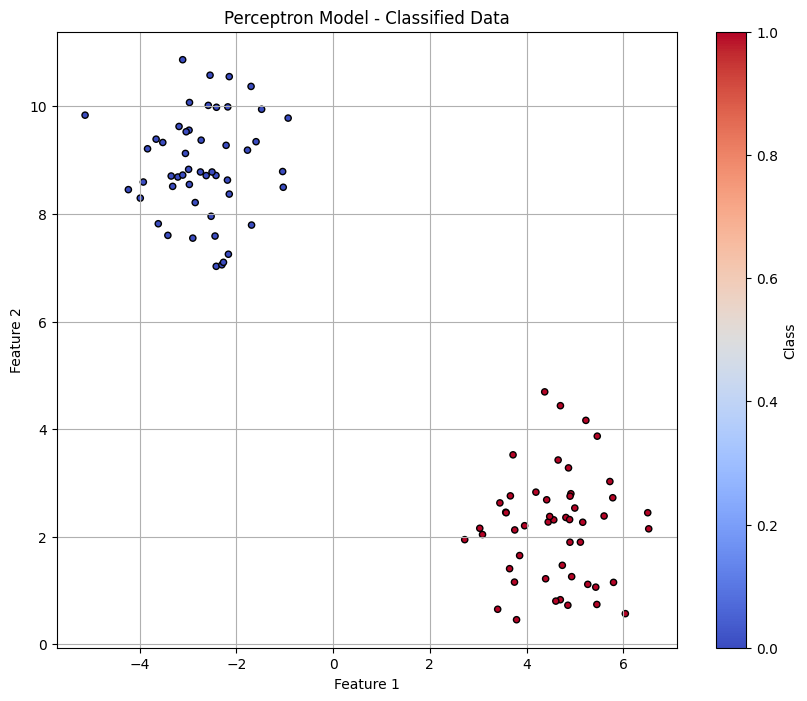

In [3]:
class CustomPerceptron:
    def __init__(self, rate=0.01, iterations=1000):
        self.rate = rate
        self.iterations = iterations

    def fit(self, X, y):
        self._initialize_weights(X.shape[1]) 
        for _ in range(self.iterations):
            for X_i, target in zip(X, y):
                prediction = self._predict(X_i)
                error = target - prediction
                self.weights[1:] += self.rate * error * X_i
                self.weights[0] += self.rate * error
                
    def _initialize_weights(self, n_features): # weights definition
        self.weights = np.zeros(1 + n_features)
    def _net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    def _predict(self, X): # prediction definition
        return np.where(self._net_input(X) >= 0.0, 1, 0)

#splitting and taking care of dimension
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
perceptron_model = CustomPerceptron(rate=0.01, iterations=1000)
perceptron_model.fit(X_train, y_train)
predictions = np.array([perceptron_model._predict(x) for x in X_test])
accuracy = np.mean(predictions == y_test)
print(f"Model Accuracy: {accuracy:.2f}")

#printing
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title("Perceptron Model - Classified Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.colorbar(label="Class")
plt.show()



## Part 2: ANN

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as part of a research study by Selçuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

### About the Data Set

Seven different types of dry beans were used in a study at Selçuk University, Turkey, taking into account features such as form, shape, type, and structure by market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by the computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

- **Number of Instances (records in the data set)**: 13,611
- **Number of Attributes (fields within each record, including the class)**: 17

### Data Set Attribute Information

1. **Area (A)**: The area of a bean zone and the number of pixels within its boundaries.
2. **Perimeter (P)**: Bean circumference is defined as the length of its border.
3. **Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.
4. **Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. **Aspect ratio (K)**: Defines the relationship between L and l.
6. **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.
7. **Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. **Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.
9. **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.
10. **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. **Roundness (R)**: Calculated with the following formula: $(4\pi A)/(P^2)$
12. **Compactness (CO)**: Measures the roundness of an object: $Ed/L$
13. **ShapeFactor1 (SF1)**
14. **ShapeFactor2 (SF2)**
15. **ShapeFactor3 (SF3)**
16. **ShapeFactor4 (SF4)**

17. **Classes**: *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*

### Libraries that can be used

- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras, Pytorch
- Any other library used during the lectures and discussion sessions.

### Building a Feed-Forward Neural Network (50 points in total)

#### 2.1 Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.

#### 2.2 Training and Testing the Neural Network (40 points)

Design a 4-layer artificial neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a multi-class classification problem so select the right number of nodes accordingly for the output layer.

For training and testing the model, split the data into training and testing sets by a __90:10__ ratio and use the training set for training the model and the test set to evaluate the model's performance.

Consider the following hyperparameters while developing your model:

- Number of nodes in each hidden layer should be (12, 3)
- Learning rate should be 0.3
- Number of epochs should be 500
- The sigmoid function should be used as the activation function in each layer
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained:__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes:__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.

### 2.3 K-fold Cross Validation (10 points in total)

In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.

__Requirements:__

- The accuracy and MSE values during each iteration of the cross validation
- The overall average accuracy and MSE value

__Note:__ The mean squared error (MSE) values obtained should be positive.


Accuracy of Model: 0.8994126284875184
MSE of Model: 0.023809523809523808
Precision for class 0: 0.8958333333333334
Recall for class 0: 0.9416058394160584
Precision for class 1: 1.0
Recall for class 1: 1.0
Precision for class 2: 0.967032967032967
Recall for class 2: 0.9025641025641026
Precision for class 3: 0.8939828080229226
Recall for class 3: 0.9122807017543859
Precision for class 4: 0.9709302325581395
Recall for class 4: 0.9226519337016574
Precision for class 5: 0.9735449735449735
Recall for class 5: 0.92
Precision for class 6: 0.8675213675213675
Recall for class 6: 0.8319672131147541


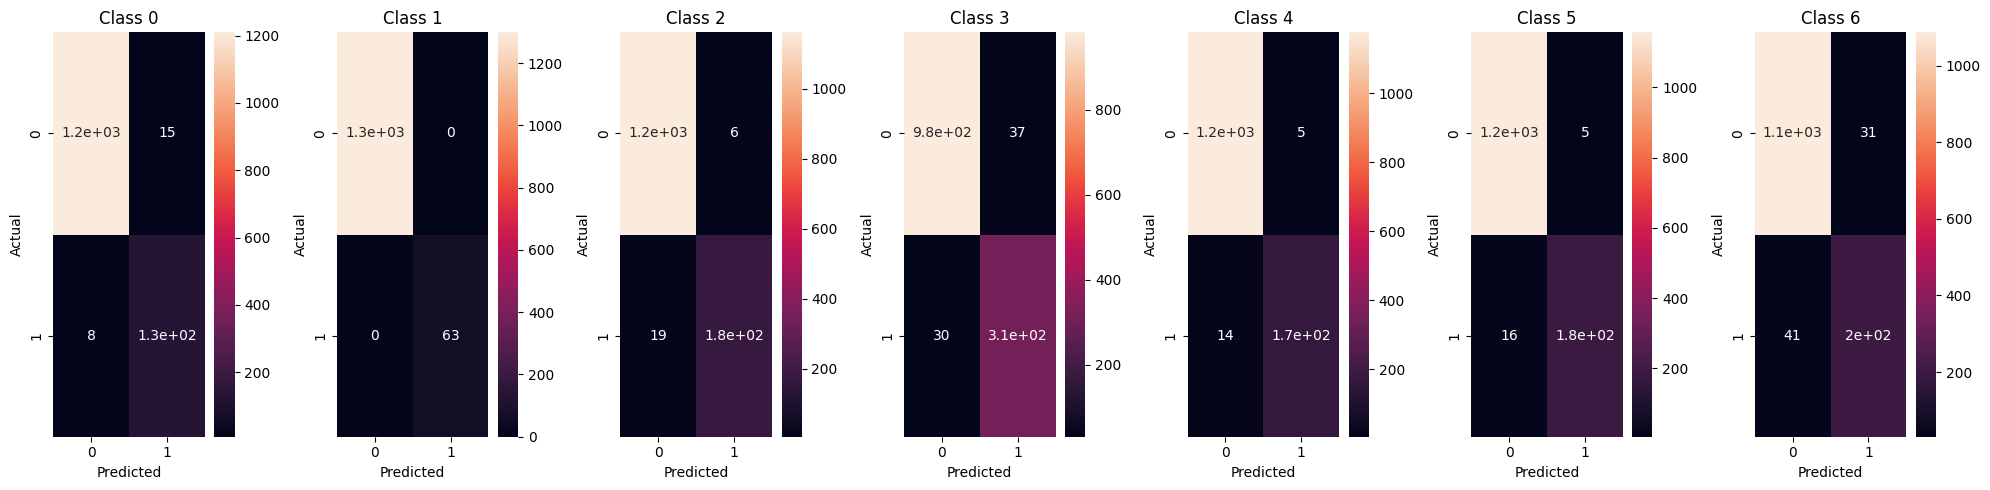

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the dataset
data = pd.read_csv("Dry_Beans_Dataset.csv")
X = data.drop('Class', axis=1)
y = pd.get_dummies(data['Class'], dtype=int)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Training the MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(12, 3), learning_rate_init=0.3, max_iter=500, solver='sgd', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = mlp_model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
model_mse = mean_squared_error(y_test, predictions)

print(f"Accuracy of Model: {model_accuracy}")
print(f"MSE of Model: {model_mse}")

# printing to represent matrices
conf_matrices = multilabel_confusion_matrix(y_test, predictions)
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
for i, matrix in enumerate(conf_matrices):
    sns.heatmap(matrix, annot=True, ax=axes[i])
    axes[i].set_title(f'Class {i}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()

precision_values = precision_score(y_test, predictions, average=None)
recall_values = recall_score(y_test, predictions, average=None)
for i in range(len(precision_values)):
    print(f"Precision for class {i}: {precision_values[i]}")
    print(f"Recall for class {i}: {recall_values[i]}")


In [13]:
import pandas as pd

# Assuming 'data_drybeans' is your DataFrame and it contains a column 'Class' that you want to predict
data_drybeans = pd.read_csv("Dry_Beans_Dataset.csv")

# Assuming the target variable 'Class' needs to be one-hot encoded
y = data_drybeans['Class']
y_one = pd.get_dummies(y, dtype=int)


In [15]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd

n_splits = 10
kf = KFold(n_splits=n_splits)
total_acc = 0
total_mse = 0

fold = 1
for train_idx, test_idx in kf.split(scaled_features):

    X_train_k, X_test_k = scaled_features[train_idx], scaled_features[test_idx]
    y_train_k, y_test_k = y_one.iloc[train_idx], y_one.iloc[test_idx]
    mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic', learning_rate_init=0.3, hidden_layer_sizes=(12, 3), max_iter=500)
    mlp.fit(X_train_k, y_train_k)
    predictions = mlp.predict(X_test_k)
    accuracy = accuracy_score(y_test_k, predictions)
    mse = mean_squared_error(y_test_k, predictions)
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}, MSE = {mse:.4f}")
    total_acc += accuracy
    total_mse += mse
    fold += 1

average_accuracy = total_acc / n_splits
average_mse = total_mse / n_splits
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average MSE: {average_mse:.4f}')

Fold 1: Accuracy = 0.8524, MSE = 0.0358
Fold 2: Accuracy = 0.8119, MSE = 0.0428
Fold 3: Accuracy = 0.8883, MSE = 0.0254
Fold 4: Accuracy = 0.9118, MSE = 0.0209
Fold 5: Accuracy = 0.9126, MSE = 0.0200
Fold 6: Accuracy = 0.8604, MSE = 0.0267
Fold 7: Accuracy = 0.9140, MSE = 0.0192
Fold 8: Accuracy = 0.9148, MSE = 0.0207
Fold 9: Accuracy = 0.8927, MSE = 0.0249
Fold 10: Accuracy = 0.8891, MSE = 0.0266
Average Accuracy: 0.8848
Average MSE: 0.0263
